In [94]:
# Import libraries:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.animation import FuncAnimation
import matplotlib.cm as cm
from matplotlib.colors import Normalize

# Directories:
dir = 'Yuri-David-File/'
fig_dir = 'Figures/'

# RF period (325 MHz frequency):
T = 1/(325*10**6)*10**9 # ns

In [95]:
# Define function to calculate emittance in one direction:
def calculate_emittance(position,momentum):
    covariance_matrix = np.cov(np.vstack((position, momentum)))
    emittance = np.sqrt(np.linalg.det(covariance_matrix))
    return emittance

In [96]:
# Values for all detectors:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []
t_vals = []; position = []
emittances_x = []; emittances_y = []
kde_vals = []
for j in range(31):

    # Load data from output txt files:
    data = np.loadtxt(dir+'out'+str(j+1)+'.txt')

    # Values for each detector:
    x = []; y = []; z = []
    px = []; py = []; pz = []
    t = []
    for i in range(data.shape[0]):
        x.append(data[i][0]/10) # mm -> cm
        y.append(data[i][1]/10)
        z.append(data[i][2]/10)
        px.append(data[i][3]) # MeV/c
        py.append(data[i][4])
        pz.append(data[i][5])
        t.append(data[i][6]) # ns
    
    # 2D Gaussian kernel density estimate:
    data = np.vstack([x,y])
    kde = gaussian_kde(data) # with positions in xy-plane
    kde_val = kde(data)
    kde_vals.append(kde_val)

    # Values for entire channel:
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)
    px_vals.append(px)
    py_vals.append(py)
    pz_vals.append(pz)
    t_vals.append(t)
    position.append(z[0]/100) # cm -> m

    # Calculate emittances:
    emittance_x = calculate_emittance(x,px)
    emittance_y = calculate_emittance(y,py)
    # print('***** Detector '+str(j+1)+' *****')
    # print("Transverse emittance (x):", emittance_x)
    # print("Transverse emittance (y):", emittance_y)

    # Emittance values along channel:
    emittances_x.append(emittance_x)
    emittances_y.append(emittance_y)

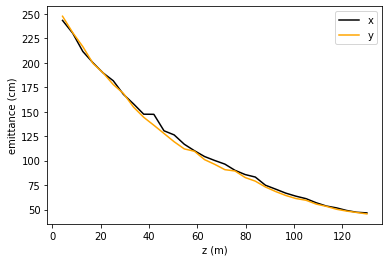

In [97]:
# Plot transverse emittance along channel:
plt.figure(1)
plt.plot(position,emittances_x,color='black',label='x')
plt.plot(position,emittances_y,color='orange',label='y')
plt.xlabel('z (m)')
plt.ylabel('emittance (cm)')
plt.legend()
plt.savefig(fig_dir+'transverse_emittance.png',dpi=300)

In [98]:
# Ratio of initial to final x emittance:
ex_initial = emittances_x[0]
ex_final = emittances_x[len(emittances_x)-1]
ex_ratio = ex_initial/ex_final
print('Ratio of inital to final x emittance: '+str(ex_ratio))

# Ratio of initial to final y emittance:
ey_initial = emittances_y[0]
ey_final = emittances_y[len(emittances_y)-1]
ey_ratio = ey_initial/ey_final
print('Ratio of inital to final y emittance: '+str(ey_ratio))

# Ratio of initial to final total transverse emittance:
transverse_e_ratio = ex_ratio * ey_ratio
print('Ratio of initial to final total transverse emittance: '+str(transverse_e_ratio))

Ratio of inital to final x emittance: 5.2259020179558195
Ratio of inital to final y emittance: 5.4394265252490595
Ratio of initial to final total transverse emittance: 28.425910054821472


In [99]:
position

[4.2501999999999995,
 8.4502,
 12.6502,
 16.8502,
 21.0502,
 25.2502,
 29.4502,
 33.6502,
 37.850199999999994,
 42.0502,
 46.25019999999999,
 50.450199999999995,
 54.6502,
 58.850199999999994,
 63.0502,
 67.25019999999999,
 71.4502,
 75.6502,
 79.8502,
 84.0502,
 88.2502,
 92.45020000000001,
 96.6502,
 100.85,
 105.05,
 109.25,
 113.45,
 117.65,
 121.85,
 126.05,
 130.25]

In [100]:
max_kde_vals = []
for i in range(31):
    max_kde_vals.append(max(kde_vals[i]))
max_kde = max(max_kde_vals)
print(max_kde)

0.016152621970476705


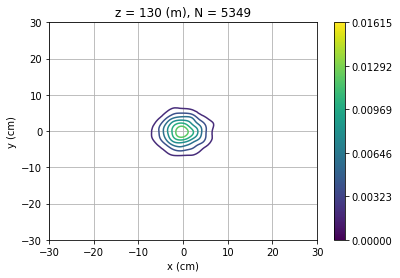

In [101]:
# Animated contour plot:
fig = plt.figure()
def animate(frame):
    plt.clf()
    im = plt.tricontour(x_vals[frame],y_vals[frame],kde_vals[frame])
    norm = Normalize(vmin=0,vmax=max_kde)
    mapp = cm.ScalarMappable(norm=norm)
    cbar = plt.colorbar(mapp)
    im.set_clim(0,max_kde)
    cbar.update_normal(im)
    cbar.set_ticks(np.linspace(0,max_kde,num=6))
    plt.xlim(-30,30)
    plt.ylim(-30,30)
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')
    plt.title('z = '+str(round(position[frame]))+' (m), N = '+str(len(x_vals[frame])))
    plt.grid()
animation = FuncAnimation(fig, animate, frames=31, interval=400, repeat=True)
animation.save(fig_dir+'contour_animation.gif', writer='pillow')

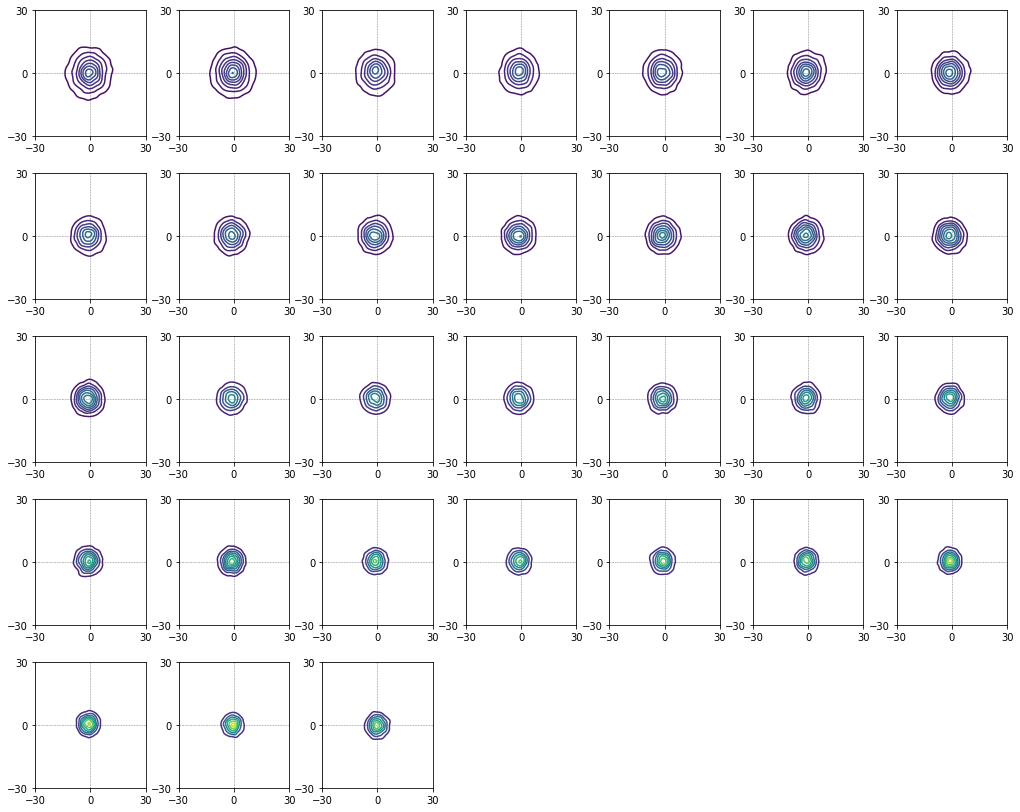

In [102]:
# Subplot of contours:
fig, axes = plt.subplots(5,7,figsize=(15,12))
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.3)
axes = axes.flatten()
for i in range(31):
    ax = axes[i]
    im = ax.tricontour(x_vals[i],y_vals[i],kde_vals[i],cmap='viridis')
    im.set_clim(0,max_kde)
    ax.set_xlim(-30,30)
    ax.set_ylim(-30,30)
    ax.set_xticks(np.linspace(-30,30,num=3))
    ax.set_yticks(np.linspace(-30,30,num=3))
    # ax.set_title('z = '+str(round(position[i]))+' (m), N = '+str(len(x_vals[i])))
    ax.grid(True,which='both',linestyle='--',color='gray',linewidth=0.5)
for i in range(31, 35):
    axes[i].axis('off')
plt.savefig(fig_dir+'contour_subplot.png',dpi=300)

In [103]:
##### WITH LIMITED RANGE OF P VALUES #####

# Values for all detectors:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []
ptotal_vals = []
t_vals = []; position = []
emittances_x = []; emittances_y = []
kde_vals = []
for j in range(31):

    # Load data from output txt files:
    data = np.loadtxt(dir+'out'+str(j+1)+'.txt')

    # Values for each detector:
    x = []; y = []; z = []
    px = []; py = []; pz = []
    ptotal = []
    t = []
    for i in range(data.shape[0]):
        px_val = data[i][3]; py_val = data[i][4]; pz_val = data[i][5]
        ptotal_val = np.sqrt(px_val**2+py_val**2+pz_val**2)
        if 0 < ptotal_val < 400:
            x.append(data[i][0]/10) # mm -> cm
            y.append(data[i][1]/10)
            z.append(data[i][2]/10)
            px.append(px_val) # MeV/c
            py.append(py_val)
            pz.append(pz_val)
            ptotal.append(ptotal_val)
            t.append(data[i][6]) # ns
    
    # 2D Gaussian kernel density estimate:
    data = np.vstack([x,y])
    kde = gaussian_kde(data) # with positions in xy-plane
    kde_val = kde(data)
    kde_vals.append(kde_val)

    # Values for entire channel:
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)
    px_vals.append(px)
    py_vals.append(py)
    pz_vals.append(pz)
    ptotal_vals.append(ptotal)
    t_vals.append(t)
    position.append(z[0]/100) # cm -> m

    # Calculate emittances:
    emittance_x = calculate_emittance(x,px)
    emittance_y = calculate_emittance(y,py)

    # Emittance values along channel:
    emittances_x.append(emittance_x)
    emittances_y.append(emittance_y)

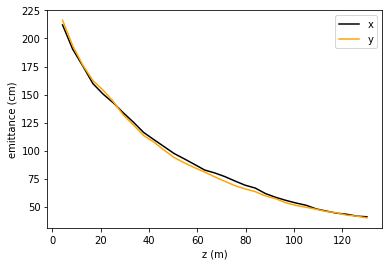

In [106]:
##### WITH LIMITED RANGE OF P VALUES #####

# Plot transverse emittance along channel:
plt.figure(1)
plt.plot(position,emittances_x,color='black',label='x')
plt.plot(position,emittances_y,color='orange',label='y')
plt.xlabel('z (m)')
plt.ylabel('emittance (cm)')
plt.legend()
plt.savefig(fig_dir+'transverse_emittance_limited_ptotal.png',dpi=300)

In [105]:
# Ratio of initial to final x emittance:
ex_initial = emittances_x[0]
ex_final = emittances_x[len(emittances_x)-1]
ex_ratio = ex_initial/ex_final
print('Ratio of inital to final x emittance: '+str(ex_ratio))

# Ratio of initial to final y emittance:
ey_initial = emittances_y[0]
ey_final = emittances_y[len(emittances_y)-1]
ey_ratio = ey_initial/ey_final
print('Ratio of inital to final y emittance: '+str(ey_ratio))

# Ratio of initial to final total transverse emittance:
transverse_e_ratio = ex_ratio * ey_ratio
print('Ratio of initial to final total transverse emittance: '+str(transverse_e_ratio))

Ratio of inital to final x emittance: 5.173758859986949
Ratio of inital to final y emittance: 5.408884176849944
Ratio of initial to final total transverse emittance: 27.98426243262061
